<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Subset-Selection" data-toc-modified-id="Subset-Selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Subset Selection</a></span><ul class="toc-item"><li><span><a href="#Mise-en-oeuvre" data-toc-modified-id="Mise-en-oeuvre-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mise en oeuvre</a></span></li><li><span><a href="#Sélection-du-modèle-optimal-par-critère-sur-l'erreur-d'apprentissage" data-toc-modified-id="Sélection-du-modèle-optimal-par-critère-sur-l'erreur-d'apprentissage-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sélection du modèle optimal par critère sur l'erreur d'apprentissage</a></span></li><li><span><a href="#Stepwises-models" data-toc-modified-id="Stepwises-models-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stepwises models</a></span></li><li><span><a href="#Sélection-par-validation-et-validation-croisée" data-toc-modified-id="Sélection-par-validation-et-validation-croisée-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Sélection par validation et validation croisée</a></span><ul class="toc-item"><li><span><a href="#Validation" data-toc-modified-id="Validation-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Validation</a></span></li><li><span><a href="#Validation-croisée" data-toc-modified-id="Validation-croisée-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Validation croisée</a></span></li></ul></li></ul></li><li><span><a href="#Ridge-regression-et-Lasso" data-toc-modified-id="Ridge-regression-et-Lasso-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ridge regression et Lasso</a></span><ul class="toc-item"><li><span><a href="#Position-du-problème---Package-utilisé" data-toc-modified-id="Position-du-problème---Package-utilisé-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Position du problème - Package utilisé</a></span></li><li><span><a href="#Étude-du-Ridge" data-toc-modified-id="Étude-du-Ridge-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Étude du Ridge</a></span></li><li><span><a href="#Étude-du-Lasso" data-toc-modified-id="Étude-du-Lasso-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Étude du Lasso</a></span></li></ul></li></ul></div>

Les exercices proposés dans cette séance de travaux pratiques sont adaptés de notre [livre de référence](http://www-bcf.usc.edu/~gareth/ISL/), chapitre 6, pp. 244-255 ainsi que des exercices plus avancés pp 258-263. 

Avant de vous lancer, vous installerez les packages utiles en lançant, sous R:
```r
install.packages("ISLR") # Normalement déjà installé
install.packages("leaps")
install.packages("glmnet")
```

Nous considèrerons dans la suite le `Hitters dataset`. Ces données contiennent différentes statistiques sur des joueurs de Baseball, et la question est de prédire le salaire des différents joueurs. Ces données sont contenues dans la librairie ISLR que vous chargerez. Vous consulterez l'aide sur ce Dataset, ainsi que le résumé `summary` des principales statistiques.

In [196]:
# install.packages("ISLR") # Normalement déjà installé
# install.packages("leaps")
# install.packages("glmnet")
library("ISLR")
help(Hitters)

Hitters                  package:ISLR                  R Documentation

_B_a_s_e_b_a_l_l _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Major League Baseball Data from the 1986 and 1987 seasons.

_U_s_a_g_e:

     Hitters
     
_F_o_r_m_a_t:

     A data frame with 322 observations of major league players on the
     following 20 variables.

     'AtBat' Number of times at bat in 1986

     'Hits' Number of hits in 1986

     'HmRun' Number of home runs in 1986

     'Runs' Number of runs in 1986

     'RBI' Number of runs batted in in 1986

     'Walks' Number of walks in 1986

     'Years' Number of years in the major leagues

     'CAtBat' Number of times at bat during his career

     'CHits' Number of hits during his career

     'CHmRun' Number of home runs during his career

     'CRuns' Number of runs during his career

     'CRBI' Number of runs batted in during his career

     'CWalks' Number of walks during his career

     'League' A factor with 

In [197]:
head(Hitters, 3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A


In [198]:
summary(Hitters)

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

Vous noterez que certaines des observations du salaire sont manquantes.  La fonction `is.na()` peut être utilisée pour identifier ces observations (combien en trouvez vous ?). La fonction `na.omit()` peut ensuite être utilisée pour supprimer toutes les lignes présentant des données manquantes. Vous noterez `Hitters` le tableau résultant. 

In [199]:
Hitters = na.omit(Hitters)
summary(Hitters)

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    

# Subset Selection

## Mise en oeuvre 

La fonction `regsubsets()` appartenant à la librairie `leaps` réalise une sélection BSS en effectuant l'identification du meilleur modèle à chaque ordre, où le "meilleur" est quantifié par le RSS le plus faible. La syntaxe est similaire à `lm()`. La fonction `summary()` rend le meilleur modèle pour chaque ordre. 

- Consultez l'aide de `regsubsets()`
- Mettez en oeuvre la fonction pour estimer `Salary` en fonction de toutes les autres variables. Vous noterez `model` l'objet retourné. 
- Vous noterez `reg.summary` l'objet retourné par la fonction `summary` appliquée  `model`. Quelles sont les variables sélectionnées pour un modèle à 4 variables ? à 8 variables ? le meilleur modèle à 4 variables est-il inclu dans celui à 8 variables ? Vous pouvez également obtenir les coefficients pour chacun des modèles via la fonction `coef()`, cf l'aide de `regsubsets()`

In [200]:
# install.packages("leaps")


In [201]:
library("leaps")
help(regsubsets)

regsubsets                package:leaps                R Documentation

_f_u_n_c_t_i_o_n_s _f_o_r _m_o_d_e_l _s_e_l_e_c_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Model selection by exhaustive search, forward or backward
     stepwise, or sequential replacement

_U_s_a_g_e:

     regsubsets(x=, ...)
     
     ## S3 method for class 'formula'
     regsubsets(x=, data=, weights=NULL, nbest=1, nvmax=8,
      force.in=NULL, force.out=NULL, intercept=TRUE,
      method=c("exhaustive", "backward", "forward", "seqrep"),
      really.big=FALSE,
      nested=(nbest==1),...)
     
     ## Default S3 method:
     regsubsets(x=, y=, weights=rep(1, length(y)), nbest=1, nvmax=8,
     force.in=NULL, force.out=NULL, intercept=TRUE,
      method=c("exhaustive","backward", "forward", "seqrep"),
     really.big=FALSE,nested=(nbest==1),...)
     
     ## S3 method for class 'biglm'
     regsubsets(x,nbest=1,nvmax=8,force.in=NULL,
     method=c("exhaustive","backward"

In [202]:
model = regsubsets(Salary ~ ., data = Hitters, method = "exhaustive", nvmax = 19)
reg.summary = summary(model)
names(reg.summary)
reg.summary

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, method = "exhaustive", 
    nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " 

In [203]:
coef(model,1:8)

[[1]]
(Intercept)        CRBI 
274.5803864   0.7909536 

[[2]]
(Intercept)        Hits        CRBI 
-47.9559022   3.3008446   0.6898994 

[[3]]
(Intercept)        Hits        CRBI     PutOuts 
-71.4592204   2.8038162   0.6825275   0.2735814 

[[4]]
 (Intercept)         Hits         CRBI    DivisionW      PutOuts 
  13.9231044    2.6757978    0.6817790 -139.9538855    0.2735002 

[[5]]
 (Intercept)        AtBat         Hits         CRBI    DivisionW      PutOuts 
  97.7684116   -1.4401428    7.1753197    0.6882079 -129.7319386    0.2905164 

[[6]]
 (Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076 

[[7]]
 (Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813 

[[8]]
 (Intercept)        AtBat         Hits        Walks       CHmRun        CRuns 
 130.9691577   -2.1731903    7.3582935    6.0037597    1.2339718    0.9651349 
      CWalks    DivisionW      PutOuts 
  -0.8323788 -117.9657795    0.2908431

<p><b>Réponse à la question 3</b></p>
<ul><li>Pour un modèle de 4 variables, les variables séléctionnées sont : Hits, CRBI, DivisionW et PutOuts</li>
<li>Pour un modèle de 8 variables, les variables séléctionnées sont : AtBat, Hits, Walks, CHmRun, CRuns, CWalks, DivisionW et PutOuts</li>
<li>Le meilleur modèle à 4 variables n'est pas inclus dans celui de 8 variables car il manque les variables ["CRBI"]</li></ul>


## Sélection du modèle optimal par critère sur l'erreur d'apprentissage

La fonction `summary()` retourne également les R2 , RSS, adjusted R2 , Cp , et BIC.
On peut examiner ces différents critères afin de sélectionner le meilleur des meilleurs modèles. Vous pouvez avoir accès au nom de ces différentes variables via `names(reg.summary)`.  Tracez ces différents critères (fonctions `plot` et `points`). Trouvez l'optimum de chacun des critères, par exemple en utilisant les fonctions `which.min()` ou `which.max()`. 

In [204]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

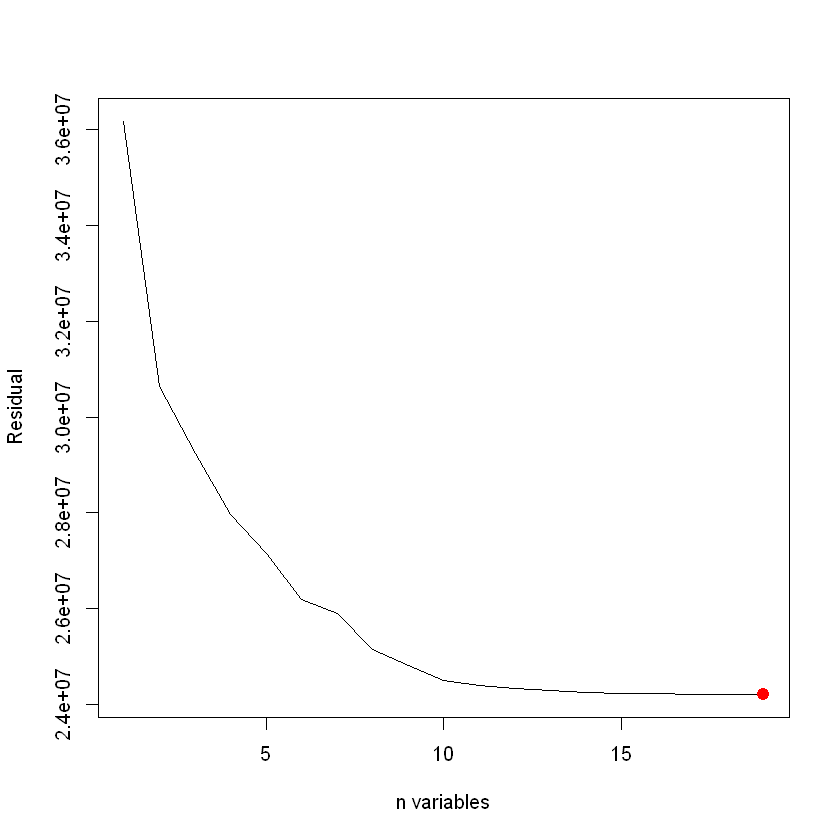

In [205]:
plot(reg.summary$rss, xlab='n variables',ylab='Residual',type='l')
z = which.min(reg.summary$rss)
points(z, reg.summary$rss[z], col='red', cex=2, pch=20)

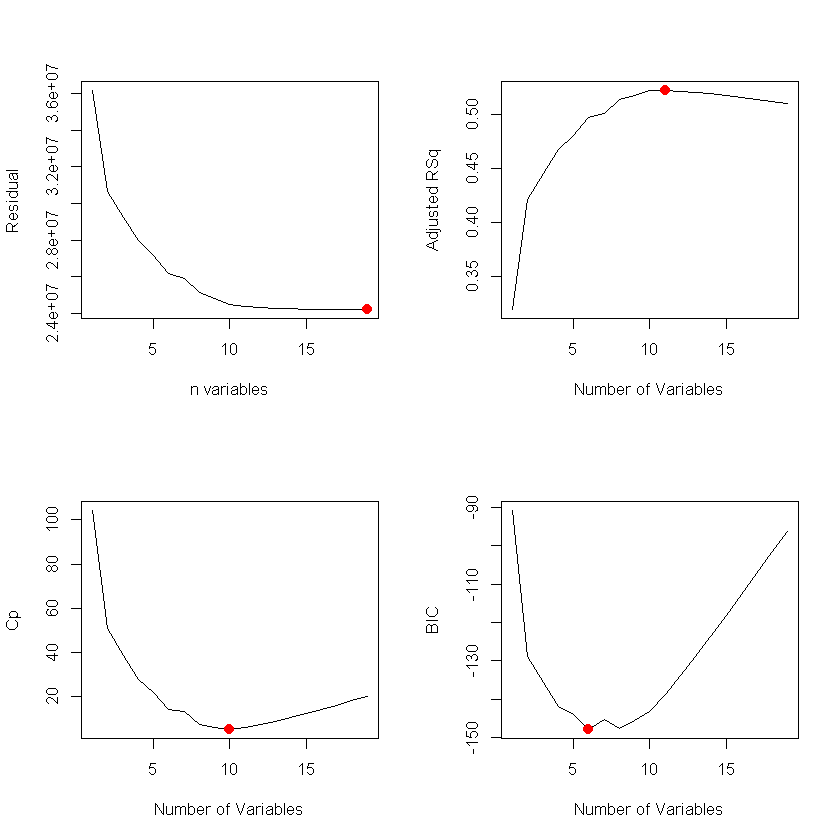

In [206]:
par(mfrow = c(2, 2))
plot(reg.summary$rss, xlab='n variables',ylab='Residual',type='l')
z = which.min(reg.summary$rss)
points(z, reg.summary$rss[z], col='red', cex=2, pch=20)

plot(reg.summary$adjr2, xlab = " Number of Variables ", ylab = " Adjusted RSq ", 
    type = "l")
z = which.max(reg.summary$adjr2)
points(z, reg.summary$adjr2[z], col = " red ", cex = 2, pch = 20)

plot(reg.summary$cp, xlab = " Number of Variables ", ylab = " Cp ", type = "l")
z = which.min(reg.summary$cp)
points(z, reg.summary$cp[z], col = " red ", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = " Number of Variables ", ylab = " BIC ", type = "l")
z = which.min(reg.summary$bic)
points(z, reg.summary$bic[z], col = " red ", cex = 2, pch = 20)

La fonction `regsubsets()` dispose d'une méthode `plot` adaptée. Vous consulterez l'aide par exemple par `?plot.regsubsets`. Utilisez cette méthode pour tacer les différents critères. 

In [207]:
?plot.regsubsets

plot.regsubsets             package:leaps              R Documentation

_G_r_a_p_h_i_c_a_l _t_a_b_l_e _o_f _b_e_s_t _s_u_b_s_e_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     Plots a table of models showing which variables are in each model.
     The models are ordered by the specified model selection statistic.
     This plot is particularly useful when there are more than ten or
     so models and the simple table produced by 'summary.regsubsets' is
     too big to read.

_U_s_a_g_e:

     ## S3 method for class 'regsubsets'
     plot(x, labels=obj$xnames, main=NULL, scale=c("bic", "Cp", "adjr2", "r2"),
     col=gray(seq(0, 0.9, length = 10)),...)
     
_A_r_g_u_m_e_n_t_s:

       x: 'regsubsets' object

  labels: variable names

    main: title for plot

   scale: which summary statistic to use for ordering plots

     col: Colors: the last color should be close to but distinct from
          white

     ...: other arguments

_V_a_l_u_e:



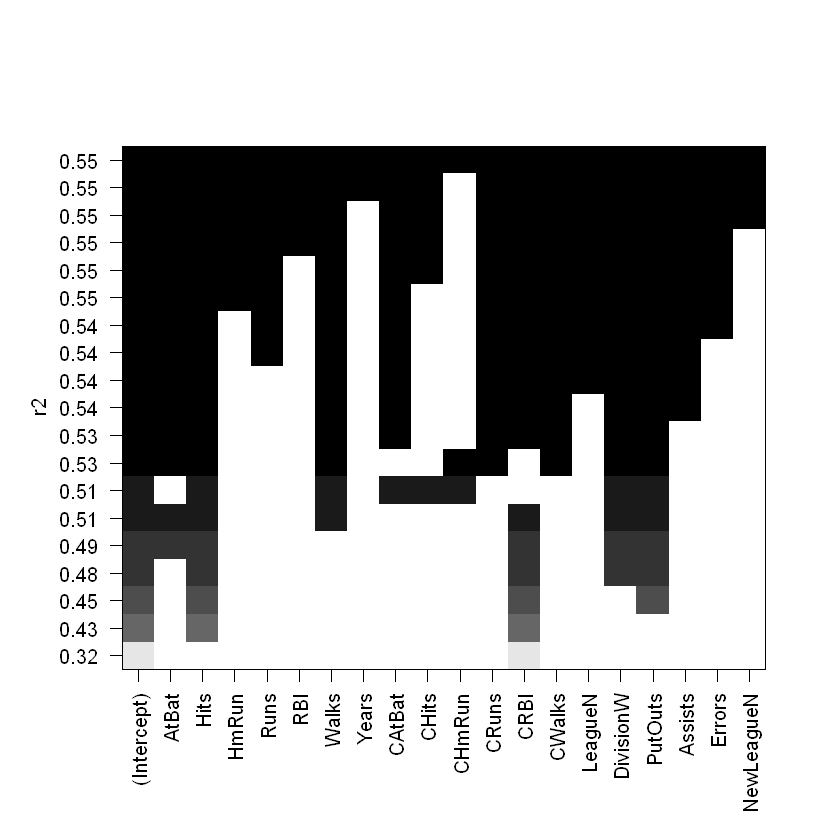

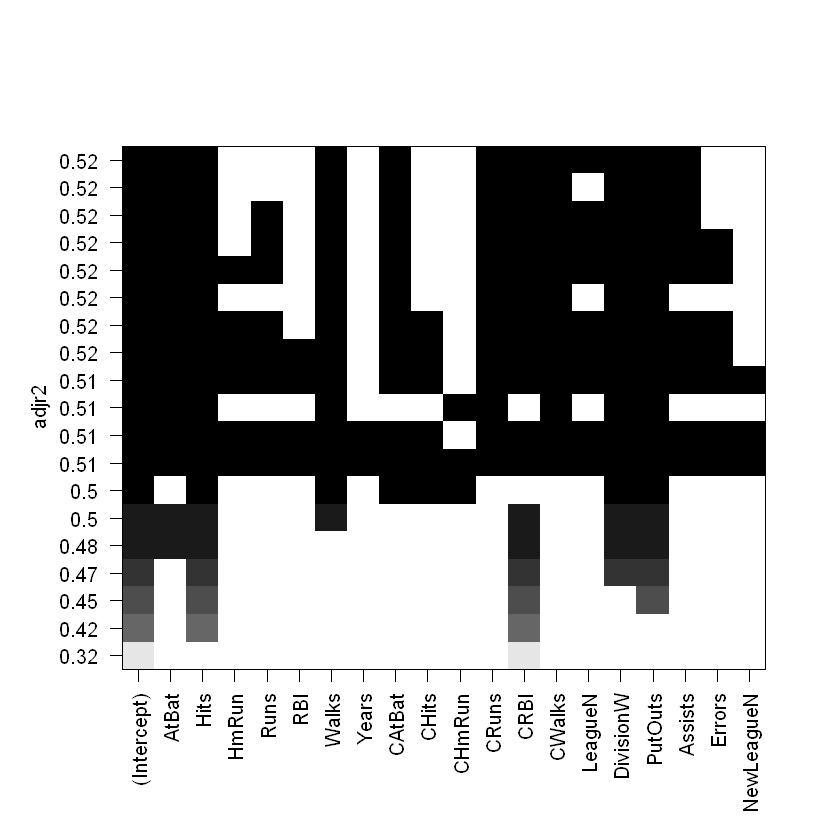

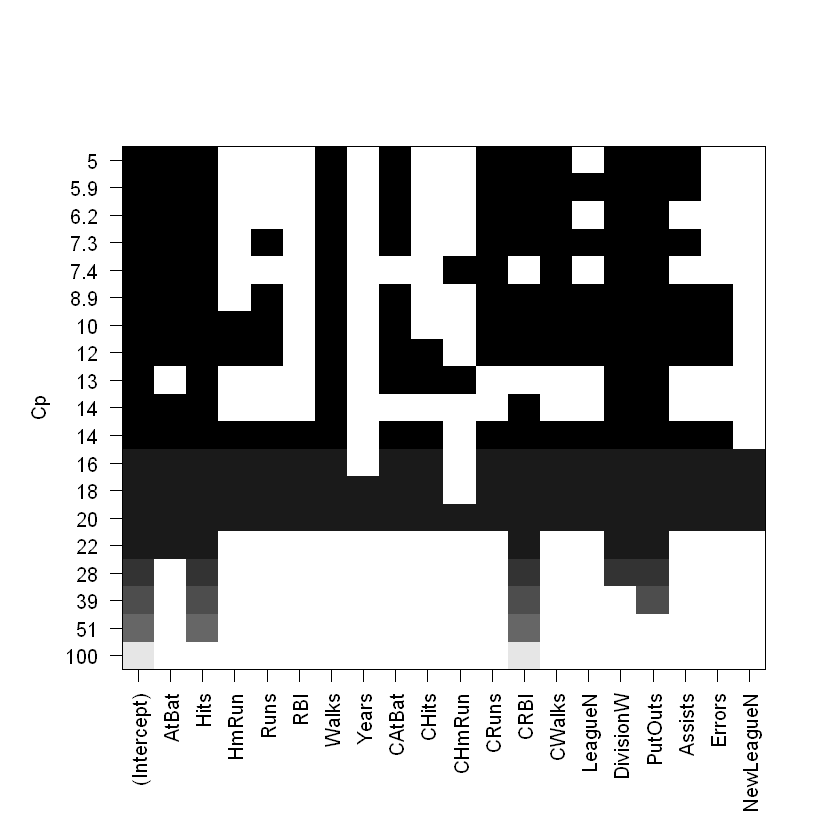

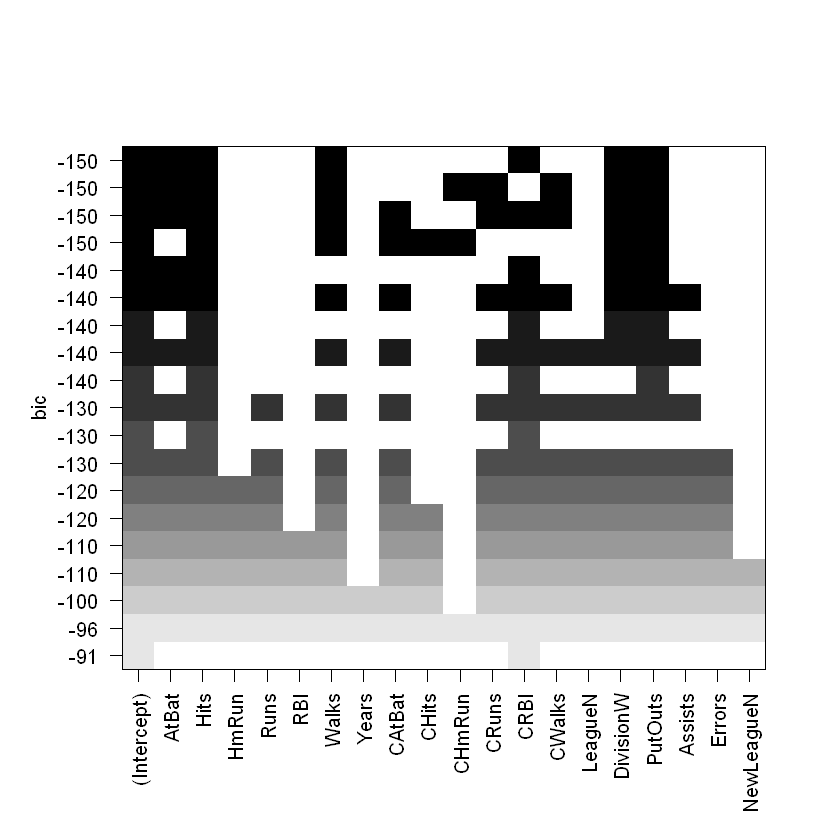

In [208]:
plot ( model , scale ="r2")
plot ( model , scale ="adjr2")
plot ( model , scale ="Cp")
plot ( model , scale ="bic")

Sélectionnez le meilleur modèle au sens du critère BIC; Quelles variables contient il ? Quels sont les coefficients du modèle ?

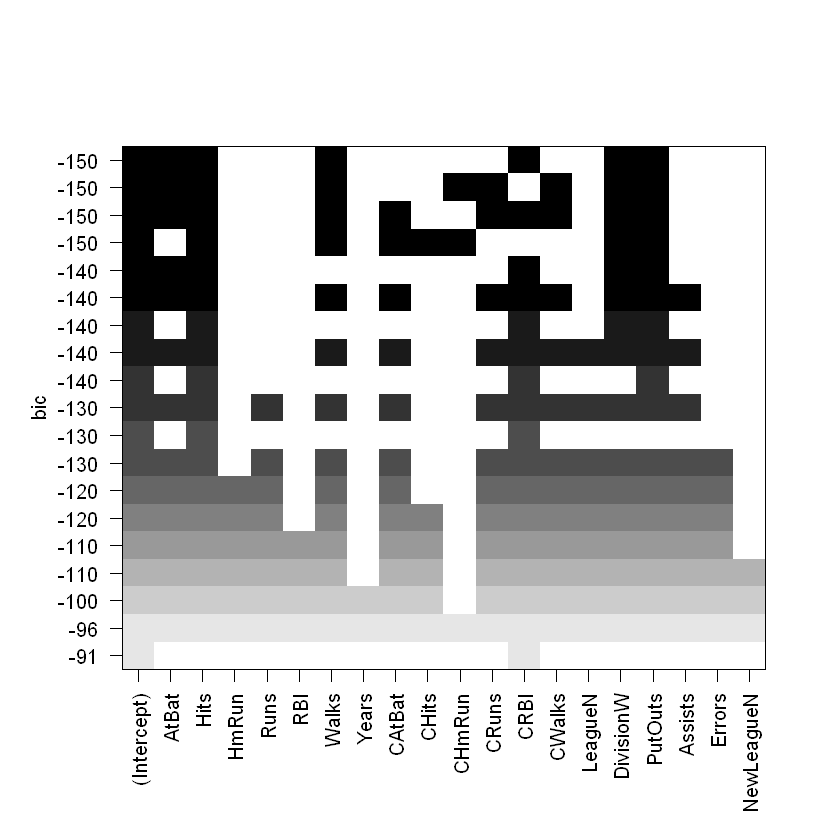

In [209]:
plot ( model , scale ="bic" )


<b>Réponse</b><br><br>
Selon la figure ci-dessus, on constate que les variables concernées sont : ['AtBat', 'Hits', 'Walks', 'CRBI', 'DivisionW', 'PutOuts'].<br> Les coefficients sont ci-dessous :

In [210]:
coef(model,6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Stepwises models

On considère maintenant le sméthodes sous-optimales, mais plus utilisables (moins lourdes en charge calculatoire), que sont les *forward* et *backward subset selection*. Il suffit ici de spécifier le paramètre `method` lors de l'appel à `regsubsets()`. Créez les modèles `regfit.full`, `regfit.fwd` et `regfit.bwd` correspondants aux modèles complets, *forward* et *backward*. Comparez les modèles obtenus à l'ordre 6, puis à l'ordre 7. Conclure. 

In [211]:
regfit.full = regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "exhaustive")
# summary(regfit.full)
regfit.fwd = regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
# summary(regfit.fwd)
regfit.bwd = regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
# summary(regfit.bwd)
ordre = 6
print(paste("Modèle full, ordre=", ordre))
coef(regfit.full, ordre)
print(paste("Modèle forward, ordre=", ordre))
coef(regfit.fwd, ordre)
print(paste("Modèle backward, ordre=", ordre))
coef(regfit.bwd, ordre)

[1] "Modèle full, ordre= 6"


(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

[1] "Modèle forward, ordre= 6"


(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

[1] "Modèle backward, ordre= 6"


(Intercept)        AtBat         Hits        Walks        CRuns    DivisionW 
  78.2664070   -1.8158931    7.3597644    3.5123248    0.6187876 -113.7958600 
     PutOuts 
   0.2995788

In [212]:
ordre = 7
print(paste("Modèle full, ordre=", ordre))
coef(regfit.full, ordre)
print(paste("Modèle forward, ordre=", ordre))
coef(regfit.fwd, ordre)
print(paste("Modèle backward, ordre=", ordre))
coef(regfit.bwd, ordre)

[1] "Modèle full, ordre= 7"


(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

[1] "Modèle forward, ordre= 7"


(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

[1] "Modèle backward, ordre= 7"


(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

<p>En passant de l'ordre 6 à 7, on constate que certains variables sont perdues, alors que d'autres sont ajoutées, et quelques unes sont gardées. Les coefficients sont différents.

## Sélection par validation et validation croisée
### Validation
Plutôt qu'utiliser un critère du type Cp, BIC ou AdjR2, on peut chercher à calculer l'erreur sur un ensemble de test. 

Créer les ensembles d'apprentissage et de test, Train et Test, en séparant la base initiale avec un ratio de 75% pour l'apprentissage. 

- On peut dès lors apprendre les différents modèles sur la base d'apprentissage Train, en utilisant `regsubsets` comme précédemment. On note par exemple `modelTrain` l'objet obtenu.

On doit ensuite évaluer les performances réelles sur la base de test. Et là, ce qui coince, c'est qu'il n'y a pas de fonction `predict` associée aux objets `regsubsets`. C'est R. Il nous faut donc calculer ces prédictions à la main. Pour ce faire : 

- Il faut définir la matrice $X$ du modèle $y = X \beta + \epsilon$, où $\beta$ est le vecteur des coefficients. Heureusement, la fonction `model.matrix()` vient à notre secours et retourne cette matrice. 
- Extraire le vecteur des coefficients estimés par `coef(modelTrain, ordre)`. 
- Estimer la valeur prédite par $\hat{y} = X \beta$. La multiplication matricielle est `%*%`. *C'est R...* Extraire les lignes adéquates de la matrice par `X[,names(beta)]` avant de faire la multiplication. 
- Enfin, en déduire l'erreur moyenne sur la base de test par `mean((Test$Salary-yhat)^2)`

Implanter ces différentes étapes, par exemple pour un ordre 6. 

In [213]:
set.seed(42)
train = sample(nrow(Hitters), 0.75 * nrow(hitters), replace = FALSE)
Train = Hitters[train, ]
Test = Hitters[-train, ]


In [214]:
modelTrain=regsubsets(Salary~.,data=Train,nvmax=19,method="forward")

In [215]:
# Voici la matrice voulue
X= model.matrix(Salary~., data=Test)

In [216]:
# Les coefficients (ordre 6)
beta=coef(modelTrain, id=6)

In [217]:
# la valeur prédite
yhat=X[,names(beta)]%*%beta

In [218]:
length(yhat)

[1] 66

In [219]:
# L'erreur moyenne sur la base de Test
mean((Test$Salary-yhat)^2)

[1] 207992.8

Ceci étant effectué, il ne nous reste plus qu'à effectuer une boucle sur tous les ordres possibles, en stockant les valeurs de l'erreur estimée (initaliser un vecteur pour stocker ce srésultats avant la boucle). Afficher les valeurs obtenues, puis rechercher le minimum et en déduire les coefficients (et variables sélectionnées) pour le modèle optimal :

In [224]:
#INSERT CODE HERE#
set.seed(42)
regfit.best=regsubsets(Salary~.,data=Train,nvmax=19)
test.mat=model.matrix(Salary~.,data=Test)
val.errors=rep(NA,19)
for(i in 1:19){
  coeff=coef(regfit.best,id=i)
  pred=test.mat[,names(coeff)]%*%coeff # dot product of coeficients is the
                                       # prediction
  val.errors[i]=mean((Test$Salary-pred)^2)
}
val.errors
which.min(val.errors)
coef(regfit.best,which.min(val.errors))

[1] 242390.4 245723.6 221235.4 227097.4 212603.1 208248.3 208720.6 207829.9
 [9] 207845.4 204758.4 196041.4 195606.7 196264.0 194164.0 194795.9 193169.6
[17] 193840.2 194046.2 194045.3

[1] 16

(Intercept)       AtBat        Hits       HmRun        Runs       Walks 
  2.3423646  -0.6289243   3.1161233   2.9030043  -1.1328770   4.6203695 
     CAtBat      CHmRun       CRuns        CRBI      CWalks     LeagueN 
 -0.1121433  -2.0913701   1.3548862   1.0820074  -0.6738803  74.4122269 
  DivisionW     PutOuts     Assists      Errors  NewLeagueN 
-92.3780840   0.3912681   0.1631880  -6.2904369 -47.8056013

**Correction**

In [ ]:
set.seed(42)
regfit.best=regsubsets(Salary~.,data=Train,nvmax=19)
test.mat=model.matrix(Salary~.,data=Test)
val.errors=rep(NA,19)
for(i in 1:19){
  coeff=coef(regfit.best,id=i)
  pred=test.mat[,names(coeff)]%*%coeff # dot product of coeficients is the
                                       # prediction
  val.errors[i]=mean((Test$Salary-pred)^2)
}
val.errors
which.min(val.errors)
coef(regfit.best,which.min(val.errors))

### Validation croisée

On peut également procéder par validation croisée, afin d'améliorer la qualité d'apprentissage et de d'estimation de l'erreur de prédction. Comme déjà indiqué, l'un des soucis est que regsubset ne dispose pas de fonction de prédiction. Qu'à ça ne tienne, on peut en définir une, et on vous la donne toute faite, cela vous évitera de la peine.

In [226]:
predict.regsubsets=function(object,newdata,id,...){ 
  form=as.formula(object$call[[2]]) ## extract formula
  mat=model.matrix(form,newdata) # compute the X matrix
  coefi=coef(object,id=id) # coefs
  xvars=names(coefi) 
  mat[,xvars]%*%coefi  # prediction
}

Il va nous falloir mettre en oeuvre la validation croisée. Il n'y a pas non plus (à la connaissance du rédacteur) de fonction toute faite. Il faut donc

1. Définir les différents sous-ensembles *folds*. Si on veut une validation croisée d'ordre $k$, il suffit d'une commande du type
```
folds=sample(1:k,nrow(Hitters),replace=TRUE)
```
2. Pour chaque *fold* $j$, faire l'apprentissage sur les $k-j$ sous-ensemble restants, et calculer la prédiction et l'erreur associée sur le $j^\mathrm{e}$ segment, et ce pour chacun de ordres de modèle. Stocker les résultats dans une matrice cv.errors de dimension $k\times \mathrm{ordre max}$.
3. Faire la moyenne de cette matrice sur les colonnes, de façon à récupérer la moyenne des erreurs estimées à un ordre donné. 



In [227]:
k=10
set.seed(42)
folds=sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors=matrix(NA,k,19,dimnames=list(NULL,paste(1:19)))

for(j in 1:k){
  best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
  for(i in 1:19){
    pred=predict(best.fit,Hitters[folds==j,],id=i)
    cv.errors[j,i]=mean((Hitters$Salary[folds==j]-pred)^2)
  }
}

mean.cv.errors=apply(cv.errors,2,mean)
mean.cv.errors
which.min(mean.cv.errors)


1        2        3        4        5        6        7        8 
143641.2 120041.6 133376.4 139694.5 131719.9 116454.0 123331.9 114363.2 
       9       10       11       12       13       14       15       16 
111726.5 108118.0 109633.3 108981.8 109671.7 109752.4 110231.7 110588.1 
      17       18       19 
110961.8 110892.9 111003.4

10 
10

**Correction**

In [ ]:
k=10
set.seed(42)
folds=sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors=matrix(NA,k,19,dimnames=list(NULL,paste(1:19)))

for(j in 1:k){
  best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
  for(i in 1:19){
    pred=predict(best.fit,Hitters[folds==j,],id=i)
    cv.errors[j,i]=mean((Hitters$Salary[folds==j]-pred)^2)
  }
}

mean.cv.errors=apply(cv.errors,2,mean)
mean.cv.errors
which.min(mean.cv.errors)


Tracer la courbe de l'erreur moyenne en fonction de l'ordre, en indiquant l'abscisse du minimum. 

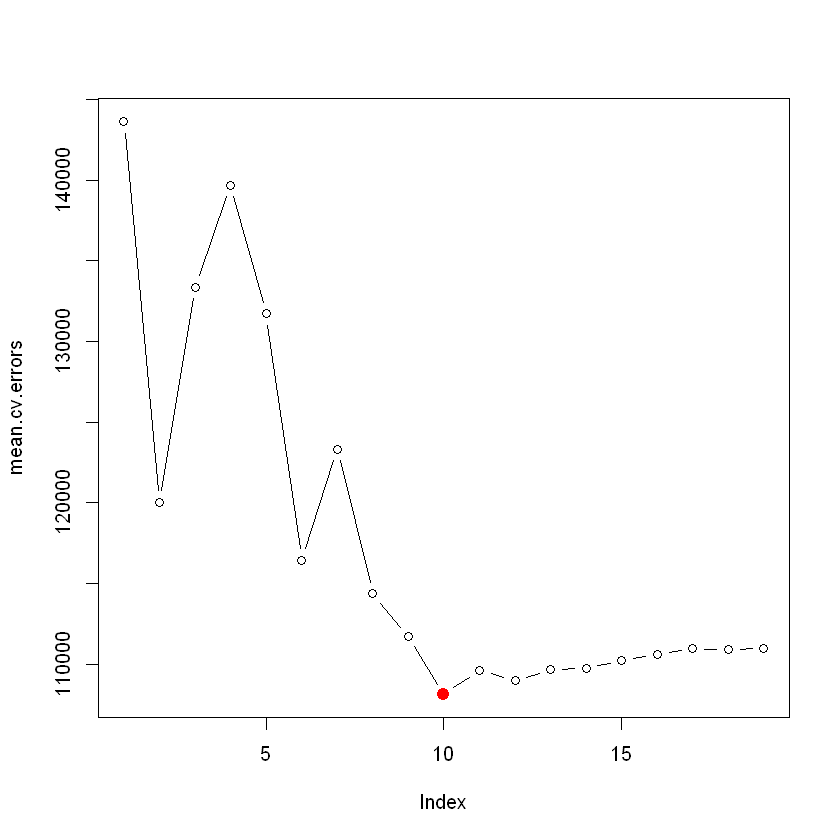

In [228]:
par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')
points(which.min(mean.cv.errors),mean.cv.errors[which.min(mean.cv.errors)],
       col="red",cex=2,pch=20)

Enfin, il ne resterait plus qu'à recalculer le modèle, au bon ordre, sur la base complète. 

In [229]:
reg.best = regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(reg.best, which.min(mean.cv.errors))

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

# Ridge regression et Lasso

## Position du problème - Package utilisé

Nous utiliserons le package `glmnet` de manière à calculer les régressions ridge et lasso.
Vous devrez probablement installer le package correspondant via 
```
 install.packages("glmnet")
```
La fonction `glmnet` a bien entendu une syntaxe différente des autres, pour que ce soit simple. C'est R. On doit passser une matrice X et un vecteur y et on ne peut malheureusement pas utiliser la syntaxe en formules y ~ x. On cherche donc à prédire la variable `Salary` en fonction du reste. 

La conversion en format matriciel se fait via la fonction `model.matrix`, qui, au passage, convertit les variables catégorielles en "dummy" variables. 

In [230]:
X= model.matrix(Salary~.,Hitters)[,-1]
y= Hitters$Salary

In [231]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 4.1.3"
Loading required package: Matrix

Loaded glmnet 4.1-3



Consulter l'aide de `glmnet()`. 

In [232]:
help(glmnet)

glmnet                 package:glmnet                  R Documentation

_f_i_t _a _G_L_M _w_i_t_h _l_a_s_s_o _o_r _e_l_a_s_t_i_c_n_e_t _r_e_g_u_l_a_r_i_z_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Fit a generalized linear model via penalized maximum likelihood.
     The regularization path is computed for the lasso or elasticnet
     penalty at a grid of values for the regularization parameter
     lambda. Can deal with all shapes of data, including very large
     sparse data matrices. Fits linear, logistic and multinomial,
     poisson, and Cox regression models.

_U_s_a_g_e:

     glmnet(
       x,
       y,
       family = c("gaussian", "binomial", "poisson", "multinomial", "cox", "mgaussian"),
       weights = NULL,
       offset = NULL,
       alpha = 1,
       nlambda = 100,
       lambda.min.ratio = ifelse(nobs < nvars, 0.01, 1e-04),
       lambda = NULL,
       standardize = TRUE,
       intercept = TRUE,
       thresh = 

La fonction `glmnet()` permet d'obtenir la solution à un problème d'optimisation du type
$$
J_\lambda(\beta) = J_\lambda(\beta) + \lambda \left( (1-\alpha) \|\beta\|_2^2 + \alpha \|\beta\|_1\|  \right) 
$$

- Le Ridge est obtenu pour $\alpha=0$ (valeur par défaut) ;
- Le Lasso est obtenu pour $\alpha=1$.

La commande  `model=glmnet(..)` prévoit ensuite que l'on fournisse une grille de paramètres $\lambda$ sur laquelle elle calcule les différents modèles. Il est ensuite possible d'accéder aux coefficients via la fonction `predict` selon
```r
predict(model, s=valeur_de_lambda_souhaitée)
```
La commande `model$lambda` rend l'ensemble des $\lambda$ qui ont été utilisés.
Les coefficients correspondants sont obtenus par 
```r
coef(model) [ ,index_du_lambda_voulu]  # l'index, pas la valeur
```

## Étude du Ridge

1 -  Nous commencerons donc par étudier le Ridge. Créer une séquence `grid` allant de $10^{10}$ à $10^{-2}$ et contenant 100 valeurs. Cette séquence nous servira de grille en $\lambda$ (vous utiliserez naturellement `seq` et une puissance). Vous créerez ensuite un modèle `ridge.model` utilisant les matrices X et y défiies précédemment et la grille de lambda. 

In [267]:
library(glmnet)
grid = 10^seq(10, -2, length = 100)
ridge.model = glmnet(X, y, alpha = 0, lambda = grid)

2 - Choisir un index de lambda, par exemple 50, vérifier quelle est la valeur de lambda correspondante. Afficher les coefficients pour cette valeur de lambda, et calculer la norme L2 de ces coefficients. Utiliser par exemple `norm_2 <- function(x) sqrt(sum(x^2))`. Vous supprimerez la ligne contenant l'intercept par `[-1, index_du_lambda_voulu]`

In [268]:
norm_2 <- function(x) if (is.vector(x)) {sqrt(sum(x^2))} else {sqrt(colSums(x^2))} 

In [269]:
ridge.model$lambda[50]
coef(ridge.model)[, 50]
norm_2(coef(ridge.model)[-1, 50])

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

3 - Tracer l'évolution de la norme L2 des coeffcients avec lambda. Vous utiliserez la fonction `plot` avec le paramètre `log="x"` pour tracer avec une échelle logarithmique pour les abscisses. 

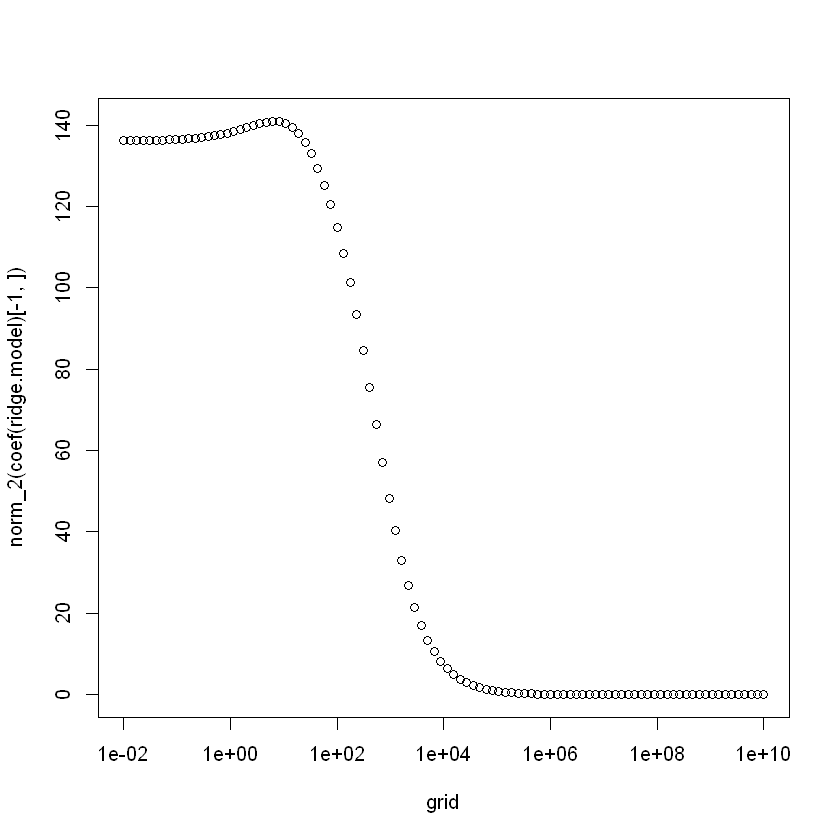

In [270]:
plot(grid,norm_2(coef(ridge.model)[-1,]), log="x")


4 - On va maintenant essayer d'évaluer les performances sur un ensemble de test, en fonction de lambda. 
- définir les indices `train` et `test` permettant de séparer la base de départ en deux ensembles  en gardant 50% dans chaque (utiliser la fonction `sample`). 
- Apprendre un nouveau modèle, `ridge.train`, sur la base d'apprentissage.
- La fonction `predict` permet de prédire les réponses pour une valeur de lambda donnée (y compris, par interpolation, pour des valeurs de lambda qui n'auraient pas été utilisées lors de l'apprentissage). Calculer l'erreur sur la base de test pour les valeurs de lambda=0, 4, 1e10. Conclusions.
- Si vous avez du temps et que cela vous chante, il serait intéressant de tracer la courbe obtenue pour l'ensemble des lambda. 

In [271]:
set.seed(1)
train=sample(1:nrow(X),nrow(X)/2)
test=(-train)
y.test=y[test]

In [272]:
ridge.train = glmnet(X[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-12)

for (lambda in c(0.0, 4, 1e10)){
    ridge.pred = predict(ridge.train, s = lambda, newx = X[test, ])
    print(paste("lambda=", lambda, "Erreur:", mean((ridge.pred - y[test])^2)))
}

[1] "lambda= 0 Erreur: 167789.778381115"
[1] "lambda= 4 Erreur: 142199.150722762"
[1] "lambda= 1e+10 Erreur: 224669.833069663"


[1] "Valeur opt de lambda"


[1] 932.6033

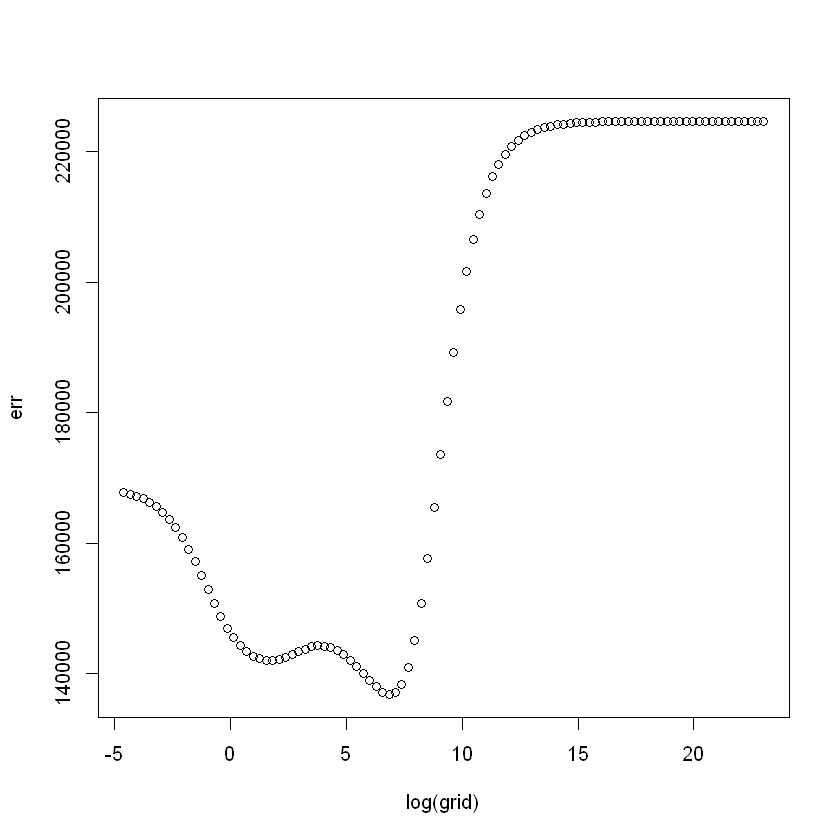

In [273]:
# Pour tous les lambda (optionnel)
ridge.train = glmnet(X[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-12)
err = rep(NA, 100)
k = 1
for (lambda in grid) {
    ridge.pred = predict(ridge.train, s = lambda, newx = X[test, ])
    err[k] = mean((ridge.pred - y[test])^2)
    k = k + 1
}
plot(log(grid), err)
print("Valeur opt de lambda")
grid[which.min(err)]

5 - Bien heureusement, il existe une fonction `cv.glmnet` qui permet de sélectionner un paramètre optimal pour lambda par validation croisée. La fonction s'utilise avec la syntaxe `cv.out = cv.glmnet(X,y,alpha=0, lambda=grid)` (alpha et lambda sont optionnels). L'objet de sortie possède une méthode plot qui trace l'erreur de prédiction en foncion de lambda, et on peut récupérer la valeur optimale de lambda par `cv.out$lambda.min`. Faites. Conclusions. 

[1] 305.3856

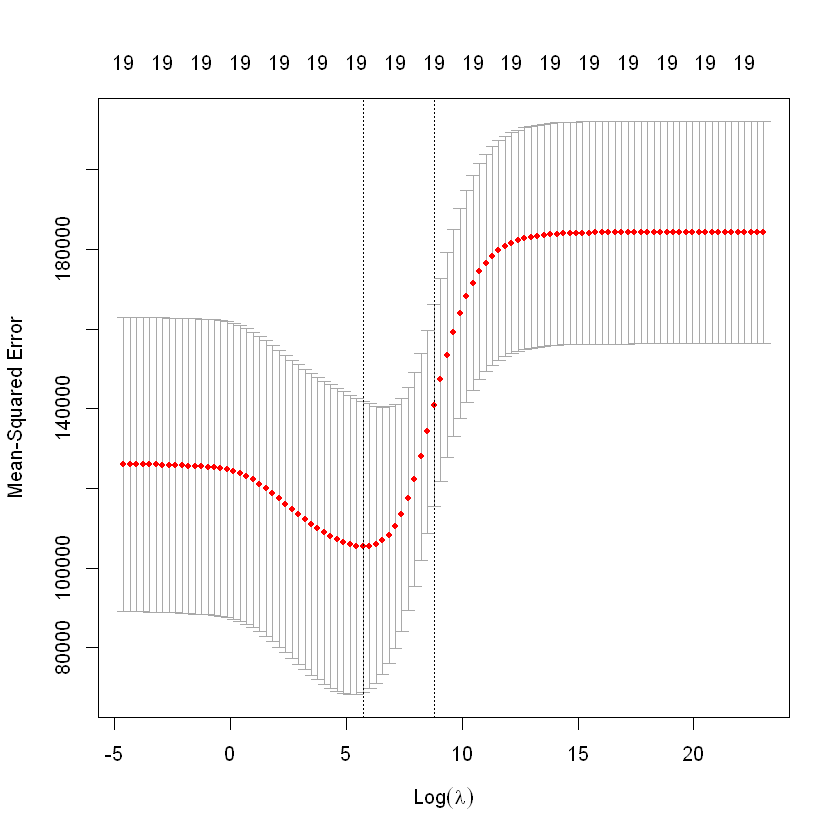

In [274]:
# Attention. On fait la validation croisée sur train, car on conserve un ensemble test 
# pour calculer correctement l'erreur de prédiction après avoir choisi lambda. Si on utilisait
# Toute la base pour calculer lambda, les données pour évaluer l'erreur de prédiction 
# auraient déjà été utilisées, et il y aurait un risque d'overfitting.  

set.seed(1)
cv.out = cv.glmnet(X[train, ], y[train], alpha = 0, lambda = grid)
plot(cv.out)
bestlam = cv.out$lambda.min
bestlam

6 - Pour la valeur optimale de lambda, calculer quels sont les coefficients du modèle optimale et visualisez les. Vous utiliserez par exemple 

```predict(out,type="coefficients",s=bestlam)```  

Existe-t-il des coefficients nuls ? En d'autres termes, la méthode fait-elle une sélection des variables ?  

In [275]:
out = glmnet(X, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam)[1:20, ]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 13.91429315   0.07166979   0.87965227   0.53587852   1.07207365   0.87917614 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.65070495   1.19367801   0.01134204   0.05848894   0.41313344   0.11655950 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12344347   0.05009204  22.84559041 -81.04537251   0.17017769   0.03110668 
      Errors   NewLeagueN 
 -1.42665062   8.94720373

## Étude du Lasso

1 - Compte-tenu de tout le travail qui a été effectué sur le Ridge, cette partie va être très facile. Apprendre un modèle lasso `lasso.mod`, en utilisant `glmnet` avec `alpha=1`, sur la mâme grille de lambda que précédemment. Faire un plot de l'objet obtenu. Observations. 

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


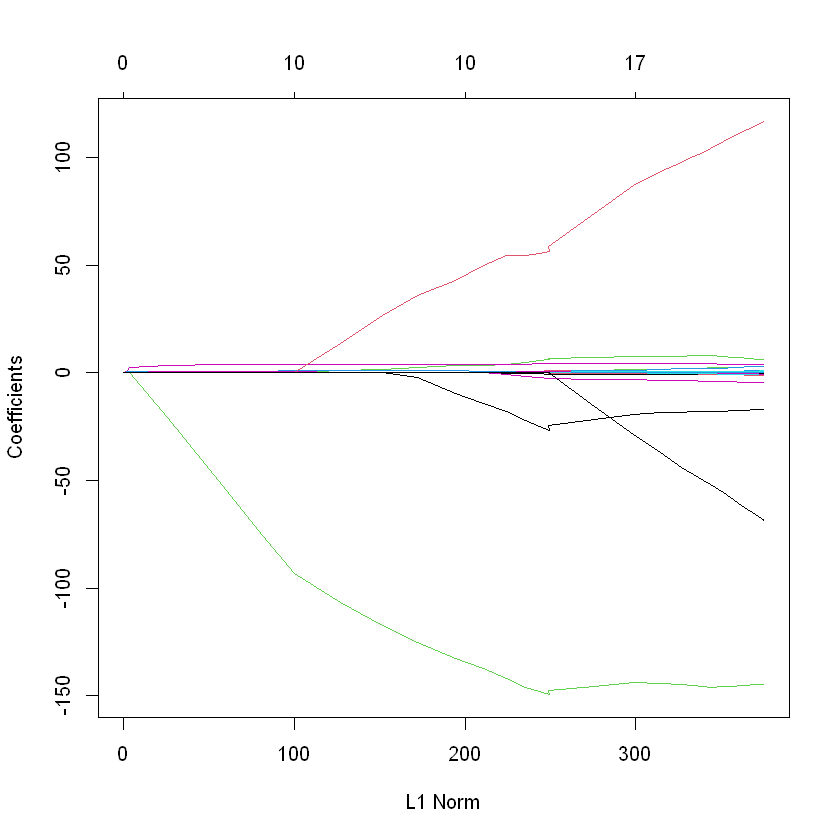

In [276]:
lasso.mod= glmnet(X[train, ], y[train], alpha = 1, lambda = grid)
plot(lasso.mod)

2 - Sélectionner le meilleur paramètre lambda par validation croisée, en suivant les mêmes étapes que précédemment. Appeler `cv.out = cv.glmnet(X,y,alpha=1, lambda=grid)` puis tracer l'erreur de prédiction en fonction de lambda (fonction `plot`), et enfin récupérer la valeur optimale de lambda par `cv.out$lambda.min`. 

[1] 9.286955

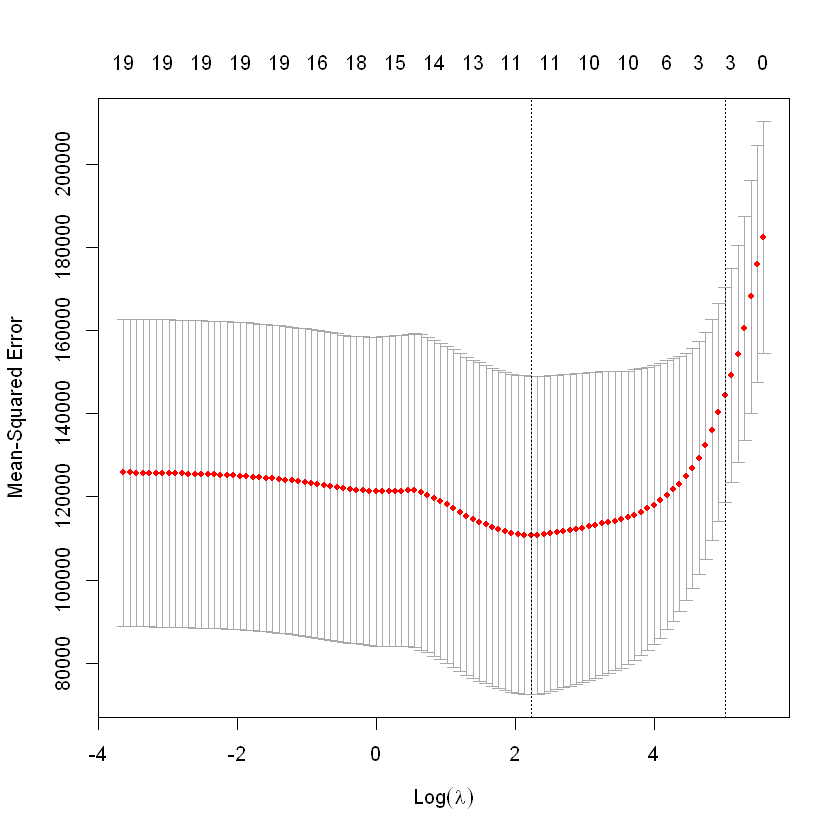

In [277]:
set.seed(1)
cv.out = cv.glmnet(X[train, ], y[train], alpha = 1)
plot(cv.out)
bestlam = cv.out$lambda.min
bestlam

3 - Prédire les résultats sur l'ensemble de test et en déduire une estimée de l'erreur de prédiction. Calculer le modèle `out` pour la base complète de données, puis observer quels sont les coefficients obtenus pour la valeur optimale de lambda
```
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:20,]
```

In [280]:
lasso.pred = predict(lasso.mod, s = bestlam, newx = X[test, ])
mean((lasso.pred - y[test])^2)

[1] 143673.6

In [281]:
out = glmnet(X, y, alpha = 1, lambda = grid)
lasso.coef = predict(out, type = "coefficients", s = bestlam)[1:20, ]
lasso.coef
lasso.coef[lasso.coef != 0]

(Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000

(Intercept)         AtBat          Hits         Walks         Years 
   1.27479059   -0.05497143    2.18034583    2.29192406   -0.33806109 
       CHmRun         CRuns          CRBI       LeagueN     DivisionW 
   0.02825013    0.21628385    0.41712537   20.28615023 -116.16755870 
      PutOuts        Errors 
   0.23752385   -0.85629148